# Understanding the problem

We're trying to **recover or infer a periodic signal** that is **corrupted by noise**. We have, <br>
<center> $ y_i = f(t_i) + \epsilon_i $ </center>

where,
* $y_i$ is the observed signal at time $t_i$
* $f(t_i)$ is the **true periodic signal**
* $\epsilon_i \sim \mathcal{N}(0, \sigma ^2)$ is the additive **Gaussian noise**

`Goal`: To infer the **posterior distribution** over parameters that define $f(t)$ given the noisy observations $y(t)$

## 1. Simple model

We start with the simplest parametric periodic function: <br>
<center> $ f(t) = A.\sin (2 \pi \omega t + \phi) $ </center>

where,
* $A$ is the **Amplitude** (height) of oscillation
* $\omega$ is the **Frequency** of oscillation
* $\phi$ is the **Phase** (horizontal shift) of oscillation

Assuming Gaussian noise, the **likelihood** of the observed data $\{y_i\}_{i=1}^{n}$ is, <br>
<center> $ \mathcal{L}(A, \omega, \phi, \sigma^2 | y) = \prod_{i=1}^{n} f(y_i | A, \omega, \phi, \sigma^2 ) = \prod_{i=1}^{n} f_{\mathcal{N}}(y_i | A.\sin (2 \pi \omega t + \phi), \sigma^2 ) $ </center>

The **negative log-likelihood** becomes, <br>
<center> $ - \log f(y | \theta) = \frac{n}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{n}(y_i - A.\sin (2 \pi \omega t + \phi))^2 $ </center>

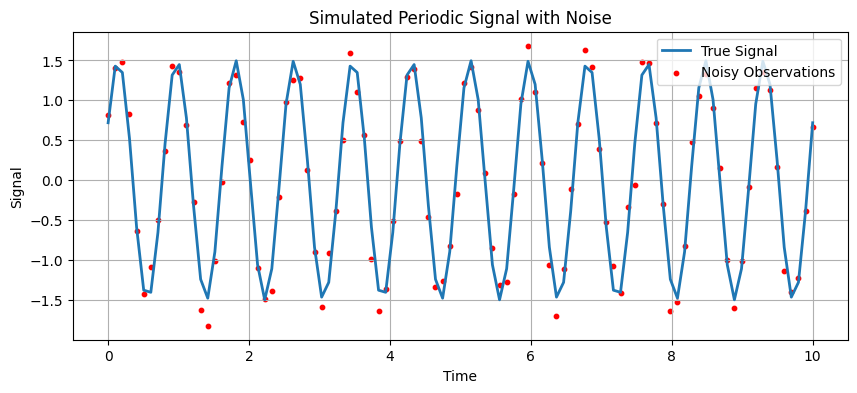

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate time points
t = np.linspace(0, 10, 100)

# True signal parameters
A_true = 1.5
omega_true = 1.2
phi_true = 0.5
sigma_true = 0.2

# Generate true signal and noisy observations
f_true = A_true * np.sin(2 * np.pi * omega_true * t + phi_true)
y_obs = f_true + np.random.normal(0, sigma_true, size=len(t))

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, f_true, label='True Signal', linewidth=2)
plt.scatter(t, y_obs, color='r', s=10, label='Noisy Observations')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Signal")
plt.title("Simulated Periodic Signal with Noise")
plt.grid(True)
plt.show()

import pymc as pm
import arviz as az

with pm.Model() as periodic_model:
    # Priors
    A = pm.Normal('A', mu=0, sigma=5)
    omega = pm.Uniform('omega', lower=0, upper=2)
    phi = pm.Uniform('phi', lower=0, upper=2 * np.pi)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Mean function (sinusoid)
    mu = A * pm.math.sin(2 * np.pi * omega * t + phi)

    # Likelihood
    Y = pm.Normal('Y', mu=mu, sigma=sigma, observed=y_obs)

    # Sampling from the posterior
    trace = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)

In [2]:
import pymc as pm

with pm.Model() as test_model:
    x = pm.Normal("x", mu=0, sigma=1)
    trace = pm.sample(500, tune=500)

import arviz as az
az.plot_trace(trace)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "C:\Python310\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1082, in transform
    return self.fn(fgraph, node)
  File "C:\Python310\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1105, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "C:\Python310\lib\site-packages\pytensor\link\c\op.py", line 119, in make_thunk
    return self.make_c_thunk(node, storage_map, compute_map, no_recycling)


You can find the C code in this temporary file: C:\Users\TIME27~1.B17\AppData\Local\Temp\pytensor_compilation_error_a_5aj8r4


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "C:\Python310\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1082, in transform
    return self.fn(fgraph, node)
  File "C:\Python310\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1105, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "C:\Python310\lib\site-packages\pytensor\link\c\op.py", line 119, in make_thunk
    return self.make_c_thunk(node, storage_map, compute_map, no_recycling)
  File "C:\Python310\lib\site-packages\pytensor\link\c\op.py", line 84, in make_c_thunk
  


You can find the C code in this temporary file: C:\Users\TIME27~1.B17\AppData\Local\Temp\pytensor_compilation_error_sf_mvg63


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "C:\Python310\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1082, in transform
    return self.fn(fgraph, node)
  File "C:\Python310\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1105, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "C:\Python310\lib\site-packages\pytensor\link\c\op.py", line 119, in make_thunk
    return self.make_c_thunk(node, storage_map, compute_map, no_recycling)
  File "C:\Python310\lib\site-packages\pytensor\link\c\op.py", line 84, in make_c_thunk
  


You can find the C code in this temporary file: C:\Users\TIME27~1.B17\AppData\Local\Temp\pytensor_compilation_error_29h7rcrn

You can find the C code in this temporary file: C:\Users\TIME27~1.B17\AppData\Local\Temp\pytensor_compilation_error_fporyiss


CompileError: Compilation failed (return status=1):
"C:\MinGW\bin\g++.exe" -shared -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -DMS_WIN64 -I"C:\Python310\lib\site-packages\numpy\core\include" -I"C:\Python310\include" -I"C:\Python310\lib\site-packages\pytensor\link\c\c_code" -L"C:\Python310\libs" -L"C:\Python310" -o "C:\Users\Time27.B1729\AppData\Local\PyTensor\compiledir_Windows-10-10.0.22635-SP0-Intel64_Family_6_Model_126_Stepping_5_GenuineIntel-3.10.7-64\lazylinker_ext\lazylinker_ext.pyd" "C:\Users\Time27.B1729\AppData\Local\PyTensor\compiledir_Windows-10-10.0.22635-SP0-Intel64_Family_6_Model_126_Stepping_5_GenuineIntel-3.10.7-64\lazylinker_ext\mod.cpp" "C:\Python310\python310.dll"
C:\Users\Time27.B1729\AppData\Local\PyTensor\compiledir_Windows-10-10.0.22635-SP0-Intel64_Family_6_Model_126_Stepping_5_GenuineIntel-3.10.7-64\lazylinker_ext\mod.cpp:1:0: sorry, unimplemented: 64-bit mode not compiled in
 #include "pytensor_mod_helper.h"
 
